In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
%matplotlib inline


In [2]:
print(tf.__version__)

2.6.2


In [4]:
dataset=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=dataset.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [10]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [47]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


# Dataset Scaling

In [17]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [21]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [23]:
y_train_categorical[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
y_test_categorical[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
classes[y_train[7]]

'Pullover'

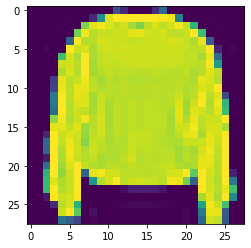

In [45]:
plt.imshow(x_train[7])

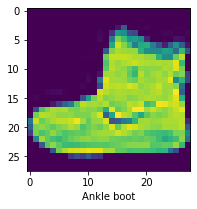

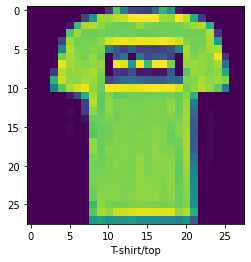

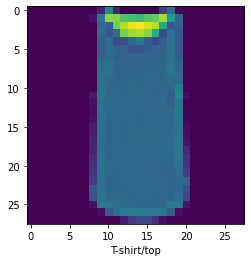

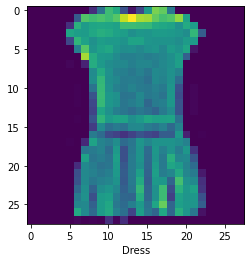

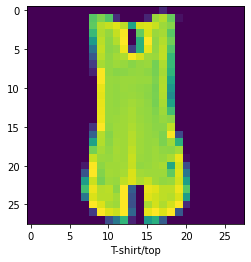

In [48]:
plt.figure(figsize=(10,3))
for i in range(5):
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i]])
    plt.show()

# Model

In [50]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(700,activation='relu'),
    keras.layers.Dense(700,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
    
])
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])


model.fit(x_train_scaled,y_train_categorical,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 16s 7ms/step - loss: 0.6780 - accuracy: 0.7792
Epoch 2/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4711 - accuracy: 0.8349
Epoch 3/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4279 - accuracy: 0.8507
Epoch 4/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4011 - accuracy: 0.8598
Epoch 5/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3812 - accuracy: 0.8665
Epoch 6/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3660 - accuracy: 0.8711
Epoch 7/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3520 - accuracy: 0.8753
Epoch 8/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3404 - accuracy: 0.8797
Epoch 9/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3305 - accuracy: 0.8833
Epoch 10/30
1875/1875 [==============================] - 14s 7ms/step - l

In [57]:
classes[np.argmax(model.predict(x_test_scaled)[2])]

'Trouser'

In [58]:
classes[np.argmax(y_test_categorical[2])]

'Trouser'

In [59]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 4ms/step - loss: 0.3310 - accuracy: 0.8817


[0.330965518951416, 0.8816999793052673]